In [32]:
# CMIP5 circulation index vs EUR tas
# Using some of Neil's code
import cmipdata as cd
import cccmautils as cutl
import pandas as pd


%matplotlib inline

# ############ NEIL's code ##################

# Some functions for wrangling dataframes
def year_lim(df, ys, ye):
    """ Limits the dataframe df to between years starting in ys and ending in
    ye inclusive"""
    dfo = df[ ( df.index.year >= ys ) & ( df.index.year <= ye ) ]
    if ( df.index.year.min() > ys ):
         print 'WARNING: data record begins after requested trend start.'
    elif ( df.index.year.max() < ye ):
         print 'WARNING: data record ends before requested trend end.',
         df.index.year.max()
    return dfo

def get_seasons(df):
    """Extract the 4 seasons and the annual mean from dataframe df, and save
    them as df.djf, df.mam, df.jja, df.son and df.ann and then return df. Note
    December is from the previous year.
    """
    df.mam = df[ ( df.index.month >= 3 ) & ( df.index.month <= 5 )]
    df.jja = df[ ( df.index.month >= 6 ) & ( df.index.month <= 8 )]
    df.son = df[ ( df.index.month >= 9 ) & ( df.index.month <= 11 )]
    dfsh = df.shift(12)
    df.djf = pd.concat( [ dfsh[dfsh.index.month==12 ] ,\
         df[ ( df.index.month >= 1 ) & ( df.index.month <= 2 )] ],axis=0)
    df.djf = df.djf.sort()
    df.ann = df.resample('A')
    df.mon = df
    return df

datapath = '/raid/ra40/data/ncs/cmip5/zg/'

ens_tas_eur = cd.mkensemble(datapath + 'eur_tas*r1i1p1*', prefix=datapath + 'eur_')
ens_tas_bks = cd.mkensemble(datapath + 'bks_tas*r1i1p1*', prefix=datapath + 'bks_')

ens_zg_eur = cd.mkensemble(datapath + 'eur_zg*r1i1p1*', prefix=datapath + 'eur_')
ens_zg_bks = cd.mkensemble(datapath + 'bks_zg*r1i1p1*', prefix=datapath + 'bks_')

(ens_tas_eur, ens_zg_eur) = cd.match_realizations(ens_tas_eur, ens_zg_eur)
(ens_tas_bks, ens_zg_bks) = cd.match_realizations(ens_tas_bks, ens_zg_bks)

d_zg_eur = cd.loadfiles(ens_zg_eur, 'zg', toDatetime=True)
print d_zg_eur['data'].shape
d_zg_bks = cd.loadfiles(ens_zg_bks, 'zg', toDatetime=True)
d_tas_eur = cd.loadfiles(ens_tas_eur, 'tas', toDatetime=True)



# make pandas dataframes
df_zg_eur = pd.DataFrame(d_zg_eur['data'].T, columns=ens_zg_eur.lister('model'),
                         index=d_zg_eur['dimensions']['time'])

df_zg_bks = pd.DataFrame(d_zg_bks['data'].T, columns=ens_zg_bks.lister('model'),
                         index=d_zg_bks['dimensions']['time'])

df_tas_eur = pd.DataFrame(d_tas_eur['data'].T, columns=ens_tas_eur.lister('model'),
                         index=d_tas_eur['dimensions']['time'])


# get the seasonal values
df_zg_eur = get_seasons(df_zg_eur).djf.resample('A')
df_zg_bks = get_seasons(df_zg_bks).djf.resample('A')
df_tas_eur = get_seasons(df_tas_eur).djf.resample('A') - 273.16 # conver tot celcius

# normalize the zg data and compute the circulation index
df_zg_eur = (df_zg_eur - df_zg_eur.mean()) / df_zg_eur.std()
df_zg_bks = (df_zg_bks - df_zg_bks.mean()) / df_zg_bks.std()
#df_dz = df_zg_eur - df_zg_bks
df_dz = df_zg_bks - df_zg_eur


# Compute the difference between the two time periods. The first period should start
# in 1979 - using 1980 since December from 1978 not available from processing. Redo
#processing to include 1978 next pass and the updates to 1979 here.

df_dz_diff = year_lim(df_dz, 2002, 2012).mean() - year_lim(df_dz, 1980, 1988).mean()

df_tas_diff = (year_lim(df_tas_eur, 2002, 2012).mean() -
              year_lim(df_tas_eur, 1980, 1988).mean())


# ################ END Neil's code ################

This ensemble contains:
1 variables
41 models
1 experiments
41 realizations
41 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
41 models
1 experiments
41 realizations
41 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
41 models
1 experiments
41 realizations
41 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
41 models
1 experiments
41 realizations
41 ncfiles

 For more details use ens.fulldetails() 

misses: 0 matches: 41
misses: 0 matches: 41
(41, 408)


/HOME/rkm/envs/cmip_env/lib/python2.7/site-packages/ipykernel/__main__.py:34: FutureWarning: sort(....) is deprecated, use sort_index(.....)


In [38]:
print df_dz.values.shape

candz=df_dz.CanESM2
cantas=df_tas_eur.CanESM2
print candz.shape

mm,bb,rval,pval = cutl.regress(candz,cantas)

print mm, rval, pval

(34, 41)
(34,)
0.225379741632 0.264803379461 0.130161432043


In [ ]:
# seasonal average
testzeur = cutl.seasonalize(d_zg_eur['data'].T,season='DJF')
testzbks = cutl.seasonalize(d_zg_bks['data'].T,season='DJF')
testtas = cutl.seasonalize(d_tas_eur['data'].T,season='DJF')

In [39]:
?cd.mkensemble

This ensemble contains:
1 variables
41 models
1 experiments
41 realizations
41 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
41 models
1 experiments
41 realizations
41 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
41 models
1 experiments
41 realizations
41 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
41 models
1 experiments
41 realizations
41 ncfiles

 For more details use ens.fulldetails() 

misses: 0 matches: 41
misses: 0 matches: 41
(41, 408)


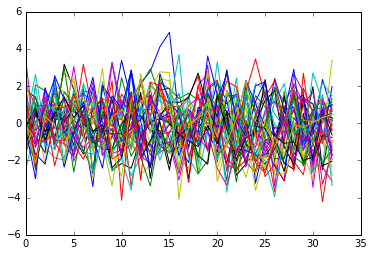

In [7]:
# create circ index
testzeurn = (testzeur - testzeur[:10,:].mean(axis=0))/testzeur.std(axis=0)
testzbksn = (testzbks - testzbks[:10,:].mean(axis=0))/testzbks.std(axis=0)
testcircidx = testzbksn-testzeurn
testtasn = (testtas - testtas[:10,:].mean(axis=0))/testtas.std(axis=0)


plt.figure()
plt.plot(testcircidx) 

# calc anomalies b/w first and last 10 years
circanom=testcircidx[-10:,:].mean(axis=0) - testcircidx[:10,:].mean(axis=0)
tasanom=testtas[-10:,:].mean(axis=0) - testtas[:10,:].mean(axis=0)
tasnanom=testtasn[-10:,:].mean(axis=0) - testtasn[:10,:].mean(axis=0)

(33, 41)
(41,)


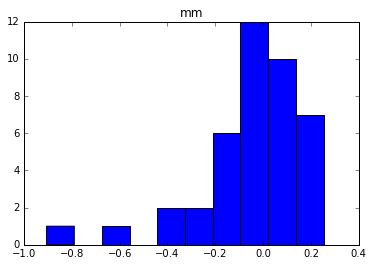

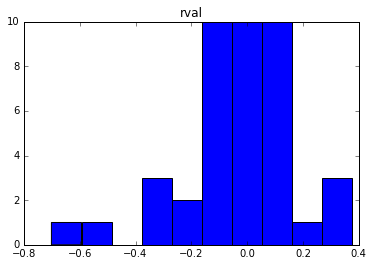

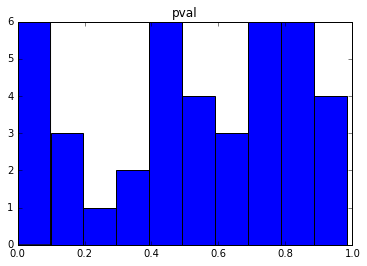

In [20]:
# do dz vs tas in time for e/ model

print testcircidx.shape

mm,bb,rval,pval = cutl.regress(testcircidx,testtas)

print mm.shape

plt.figure()
plt.hist(mm)
plt.title('mm')

plt.figure()
plt.hist(rval)
plt.title('rval')

plt.figure()
plt.hist(pval)
plt.title('pval')


circpd = pd.DataFrame(testcircidx, columns=ens_zg_eur.lister('model'))
taspd = pd.DataFrame(testtas, columns=ens_tas_eur.lister('model'))


In [29]:

taspd.values.shape

mm,bb,rval,pval=cutl.regress(circpd.values,taspd.values)

mmpd = pd.Series(mm, index=ens_tas_eur.lister('model'))
rvalpd = pd.Series(rval, index=ens_tas_eur.lister('model'))
pvalpd = pd.Series(pval, index=ens_tas_eur.lister('model'))

print mmpd
print rvalpd

bcc-csm1-1-m       -0.414386
ACCESS1-0          -0.025542
ACCESS1-3          -0.905369
CESM1-CAM5-1-FV2   -0.111291
FGOALS-g2          -0.007513
MIROC5             -0.137337
FIO-ESM             0.025535
CMCC-CMS            0.159271
MPI-ESM-LR          0.156651
IPSL-CM5B-LR       -0.087718
MIROC-ESM           0.252707
HadGEM2-AO         -0.146308
CMCC-CM             0.098206
MPI-ESM-MR         -0.104451
CSIRO-Mk3-6-0       0.237486
CESM1-BGC          -0.075152
inmcm4              0.038991
GISS-E2-R-CC       -0.003557
BNU-ESM            -0.165457
CCSM4              -0.012344
GFDL-ESM2G         -0.671362
EC-EARTH            0.095731
GFDL-ESM2M         -0.061642
NorESM1-M           0.052179
IPSL-CM5A-MR       -0.060386
IPSL-CM5A-LR       -0.037056
GFDL-CM3           -0.221434
CNRM-CM5            0.116253
GISS-E2-H          -0.156054
MIROC-ESM-CHEM      0.147430
bcc-csm1-1          0.020218
NorESM1-ME          0.041423
CanESM2             0.232055
GISS-E2-R           0.090736
HadGEM2-CC    

-0.0945833982332 0.842976016977 -0.0955765546772 0.552227221281
-0.0946074489298 0.621040115434 -0.135157093005 0.399485824799


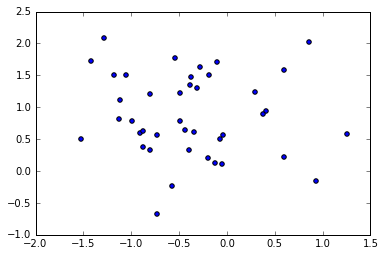

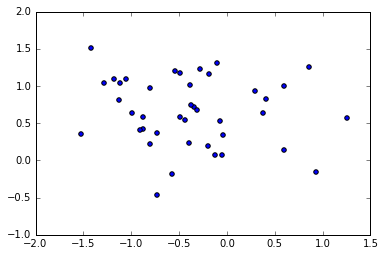

In [8]:
plt.figure()
plt.scatter(circanom,tasanom)

mm,bb,rval,pval = cutl.regress(circanom,tasanom)
print mm,bb,rval,pval

# try normalizing sat too
plt.figure()
plt.scatter(circanom,tasnanom)

mm,bb,rval,pval = cutl.regress(circanom,tasnanom)
print mm,bb,rval,pval

In [15]:
canzeur = df_zg_eurpd.CanESM2
canzbks = df_zg_bkspd.CanESM2
cantaseur = df_tas_eurpd.CanESM2


1979-01-16 12:00:00    5436.298340
1979-02-15 00:00:00    5404.293457
1979-03-16 12:00:00    5458.325195
1979-04-16 00:00:00    5543.022461
1979-05-16 12:00:00    5616.020508
1979-06-16 00:00:00    5673.113770
1979-07-16 12:00:00    5716.570312
1979-08-16 12:00:00    5735.193359
1979-09-16 00:00:00    5683.673340
1979-10-16 12:00:00    5577.631836
1979-11-16 00:00:00    5526.323730
1979-12-16 12:00:00    5463.802734
1980-01-16 12:00:00    5442.587402
1980-02-15 00:00:00    5424.842285
1980-03-16 12:00:00    5476.725586
1980-04-16 00:00:00    5559.685059
1980-05-16 12:00:00    5593.067871
1980-06-16 00:00:00    5665.641602
1980-07-16 12:00:00    5715.955078
1980-08-16 12:00:00    5729.483887
1980-09-16 00:00:00    5639.114258
1980-10-16 12:00:00    5527.246094
1980-11-16 00:00:00    5493.533203
1980-12-16 12:00:00    5481.465820
1981-01-16 12:00:00    5390.429688
1981-02-15 00:00:00    5383.197266
1981-03-16 12:00:00    5443.728516
1981-04-16 00:00:00    5521.157227
1981-05-16 12:00:00 